## 3.1 지도 학습

### 3.1.1 K-최근접 이웃

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pda
from sklearn import metrics

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv('./data/iris.data', names = names)

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(x_train)
x_train = s.transform(x_train)
x_test = s.transform(x_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [12]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(x_test)
print("accuracy: {}".format(accuracy_score(y_test, y_pred)))

accuracy: 0.6333333333333333


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
k = 1
acc_array = np.zeros(k)
for k in np.arange(1, k+1):
    classifier = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_array[k-1] = acc

max_acc = np.max(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print(f"accuracy: {max_acc} -> k: {k+1}")

accuracy: 0.9666666666666667 -> k: 1


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 3.2.2 서포트 벡터 머신

In [5]:
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection

import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [7]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = \
model_selection.train_test_split(iris.data, iris.target, test_size=0.6, random_state=42)

In [8]:
svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5)
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)
score = metrics.accuracy_score(y_test, predictions)
print("accuracy: {0:f}".format(score))

accuracy: 0.988889


### 3.1.3 결정 트리

In [28]:
import pandas as pd
df = pd.read_csv('data/titanic/train.csv', index_col='PassengerId')
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [29]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = df.dropna() 
X = df.drop('Survived', axis=1)
y = df['Survived']

             Pclass  Sex   Age  SibSp  Parch     Fare
PassengerId                                          
1                 3    0  22.0      1      0   7.2500
2                 1    1  38.0      1      0  71.2833
3                 3    1  26.0      0      0   7.9250
4                 1    1  35.0      1      0  53.1000
5                 3    0  35.0      0      0   8.0500
...             ...  ...   ...    ...    ...      ...
886               3    1  39.0      0      5  29.1250
887               2    0  27.0      0      0  13.0000
888               1    1  19.0      0      0  30.0000
890               1    0  26.0      0      0  30.0000
891               3    0  32.0      0      0   7.7500

[714 rows x 6 columns]


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [32]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [33]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8324022346368715

In [35]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Survived', 'Predicted Suvived'],
    index = ['True Not Survived', 'True, Survived']
)

,Predicted Not Survived,Predicted Suvived
True Not Survived,99,13
"True, Survived",17,50


### 3.1.4 로지스틱 회귀와 선형 회귀

#### 로지스틱 회귀

In [36]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

print("Image Data Shape:", digits.data.shape)
print("Label Data Shape:", digits.target.shape)

Image Data Shape: (1797, 64)
Label Data Shape: (1797,)


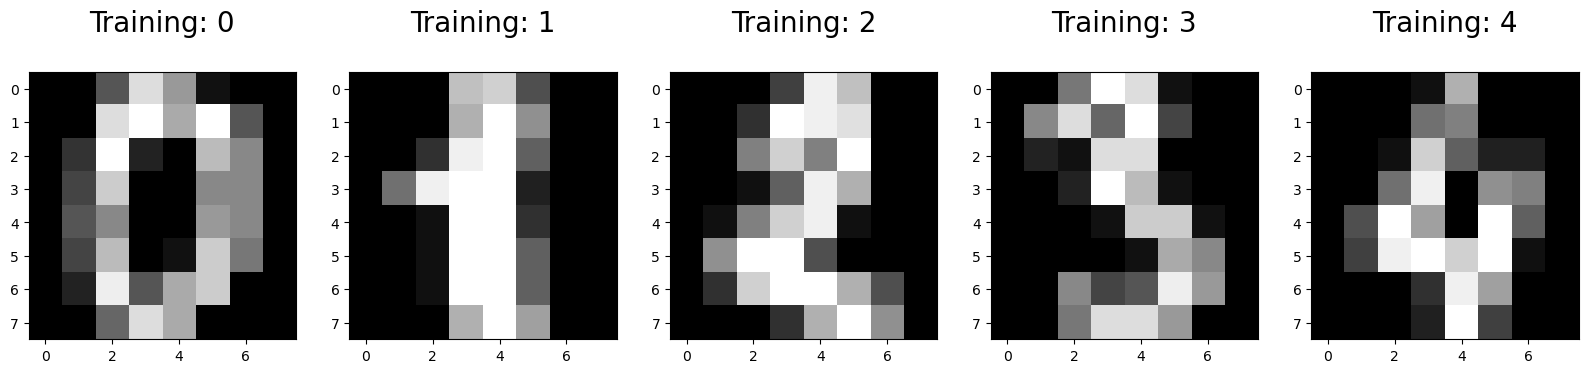

In [40]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for index, (img, lb) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(img, (8, 8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' %lb, fontsize=20)


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

logisticRegr.predict(x_test[0].reshape(1, -1))
logisticRegr.predict(x_test[0:10])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [42]:
predictions = logisticRegr.predict(x_test)
score - logisticRegr.score(x_test, y_test)
print(score)

0.9888888888888889


<function matplotlib.pyplot.show(close=None, block=None)>

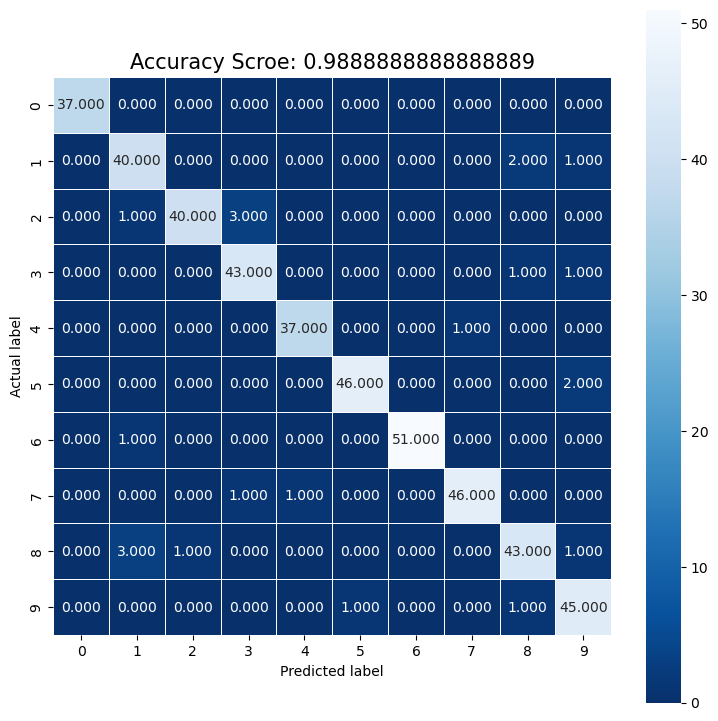

In [43]:
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Scroe: {0}'.format(score)
plt.title(all_sample_title, size=15)
plt.show


#### 선형 회귀

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

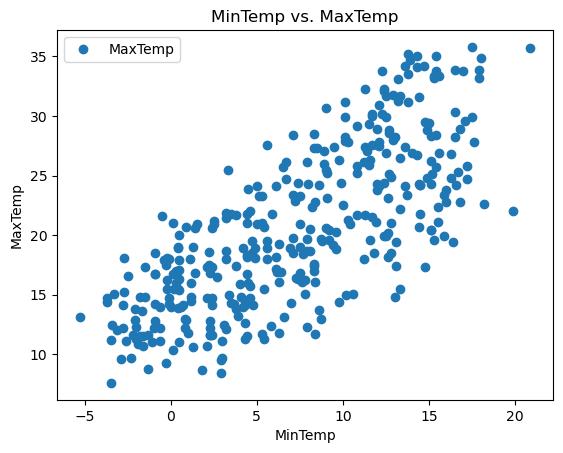

In [47]:
dataset = pd.read_csv('./data/weather.csv')
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs. MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [61]:
x = dataset['MinTemp'].values.reshape(-1, 1)
y = dataset['MaxTemp'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [62]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,35.0,26.827160
1,16.7,13.704061
2,16.4,20.783627
3,19.6,24.496083
4,18.4,21.128972
...,...,...
69,12.8,13.704061
70,9.6,11.977337
71,22.8,28.294875
72,16.5,16.812163


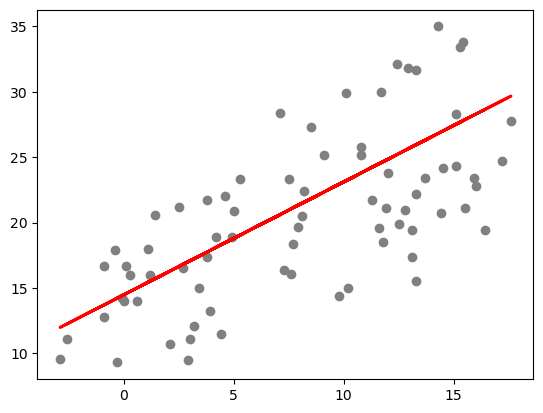

In [64]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [65]:
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print('sqrt MSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE:  22.528626760653502
sqrt MSE:  4.746433056586125


## 3.2 비지도 학습

### 3.2.1 K-평균 군집화


In [79]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('data/sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [80]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [14]:
sum_of_squared_distances = []
K = range(1, 15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

NameError: name 'KMeans' is not defined

### 3.2.2~3 밀도 기반 군집 분석과 주성분 분석 (PCA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
x = pd.read_csv('data/credit card.csv')
x = x.drop('CUST_ID', axis =1)
x.fillna(method='ffill', inplace=True)
print(x.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [6]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_normalized = normalize(x_scaled)
x_normalized = pd.DataFrame(x_normalized)

pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normalized)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1', 'P2']
print(x_principal.head())

         P1        P2
0 -0.489949 -0.679975
1 -0.519099  0.544830
2  0.330633  0.268881
3 -0.481656 -0.097614
4 -0.563512 -0.482505


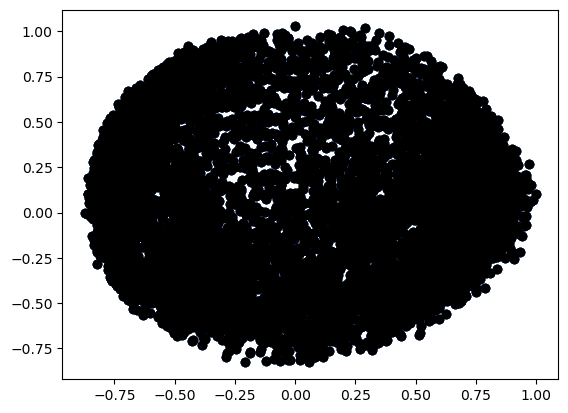

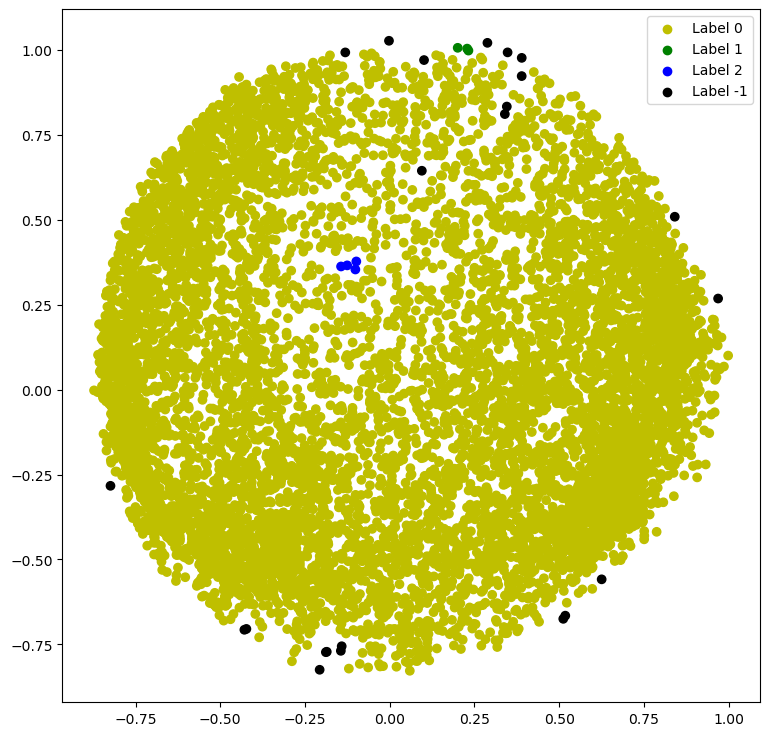

In [8]:
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(x_principal)
labels = db_default.labels_

colours = {} 
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]
  
r = plt.scatter(x_principal['P1'], x_principal['P2'], color ='y'); 
g = plt.scatter(x_principal['P1'], x_principal['P2'], color ='g'); 
b = plt.scatter(x_principal['P1'], x_principal['P2'], color ='b'); 
k = plt.scatter(x_principal['P1'], x_principal['P2'], color ='k'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(x_principal['P1'], x_principal['P2'], c = cvec) 
  
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

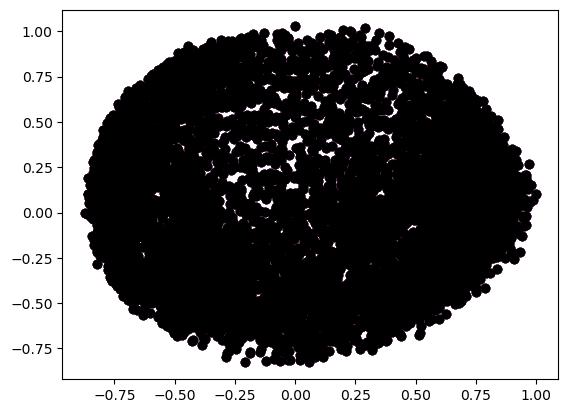

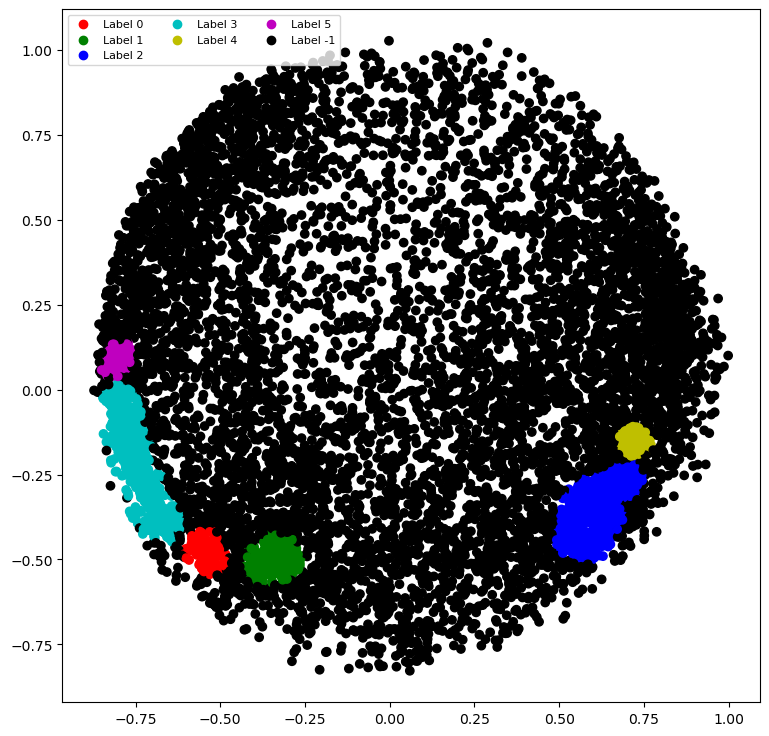

In [10]:
db = DBSCAN(eps=0.0375, min_samples=50).fit(x_principal)
labels1 = db.labels_

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(
    x_principal['P1'], x_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter( 
    x_principal['P1'], x_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter( 
    x_principal['P1'], x_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter( 
    x_principal['P1'], x_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter( 
    x_principal['P1'], x_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter( 
    x_principal['P1'], x_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter( 
    x_principal['P1'], x_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(x_principal['P1'], x_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show()


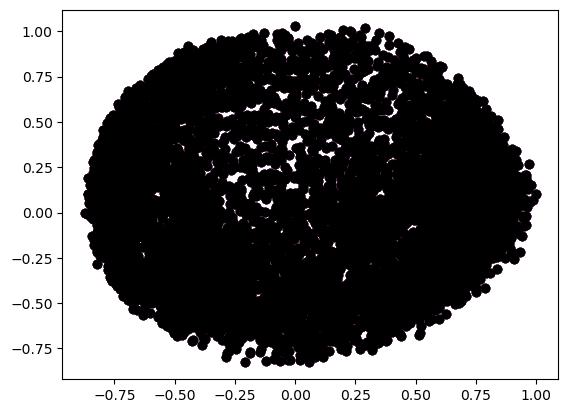

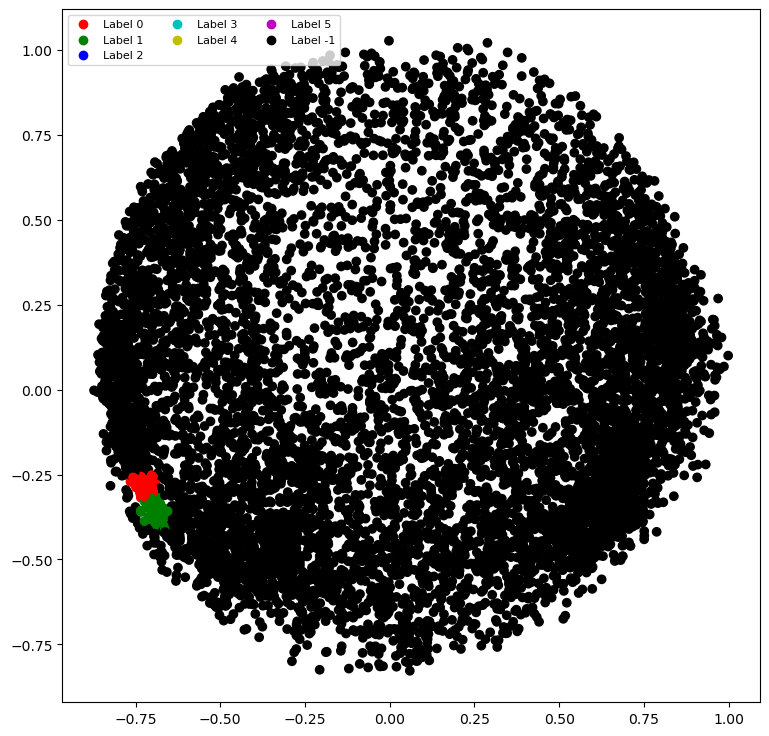

In [13]:
db = DBSCAN(eps=0.0375, min_samples=100).fit(x_principal)
labels1 = db.labels_

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(
    x_principal['P1'], x_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter( 
    x_principal['P1'], x_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter( 
    x_principal['P1'], x_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter( 
    x_principal['P1'], x_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter( 
    x_principal['P1'], x_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter( 
    x_principal['P1'], x_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter( 
    x_principal['P1'], x_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(x_principal['P1'], x_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show()
